In [1]:
# -*- coding: utf-8 -*-
"""유튜브_댓글_분석_안성근.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1DhPGwp5xjkm3_QaQfZW_o1irN8XaSdbZ

# 텍스트 분석 라이브러리 초기화
"""
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
# 시각화 결과가 선명하게 표시
# %config InlineBackend.figure_fromat = 'retina'
# range 대신 처리 시간을 알려주는 라이브러리
from tqdm import trange

In [2]:
"""# 시각화를 위한 한글폰트 설정"""

# 윈도우 한글폰트 설정
plt.rc("font", family='Malgun Gothic')

In [3]:
# 유튜브 크롤링 파일 로드
path = '/home/lab10/official_youtube/comment/'

frames=[]
comment_file = f'comments_GOT7.csv'  #GOT7 
df = pd.read_csv(path+comment_file, encoding='utf-8', header=None)
# print(df)
# print('\n')
frames.append(df)


df = pd.concat(frames, ignore_index=True)
df.columns=['comment','like']

In [4]:
df

,comment,like
0,I remember GOT7 was my first favorite boy grou...,3.8천
1,Ok.. I m not crying😭 they'll come back and shi...,998
2,"For everyone's info, GOT7 DID NOT disb*nd. The...",596
3,"I'm not a fan of got7, but they were wonderful...",453
4,"Sinto tanta falta de vcs juntinhos, mas entend...",48
...,...,...
778450,@VocaloidC00kies Srry if I offended u just for...,0
778451,JB&JR china fan first site welcome to you,0
778452,go away goshhh,0
778453,Cry*,0


In [5]:
df.describe()

,comment,like
count,778439,778455
unique,698799,1059
top,💚💚💚💚💚💚💚,0
freq,1235,432783


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778455 entries, 0 to 778454
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   comment  778439 non-null  object
 1   like     778455 non-null  object
dtypes: object(2)
memory usage: 11.9+ MB


In [7]:
df.shape

(778455, 2)

In [8]:
df.count()

comment    778439
like       778455
dtype: int64

In [9]:
df.value_counts()

comment                                                                   like
💚💚💚💚💚💚💚                                                                   0       1049
💚                                                                         0        978
💚💚💚                                                                       0        927
😍😍😍                                                                       0        641
❤                                                                         0        483
                                                                                  ... 
JB es tan chic que corta las uñas de su mano derecha con la mano derecha  0          1
JB es tan hermoso💖                                                        0          1
JB es tan maduro para su edad 💕                                           0          1
JB es tan papi 😄😍                                                         0          1
󾓮󾓮󾓮󾓮สุขสันต์วันเกิดน่ะพี่เเบมที่รัก💖               

In [10]:
import re

In [11]:
df.like[0]

'3.8천'

In [ ]:
# for i in range(len(df.like)):
#     if df.like[i].find('십만'):
#         print('ture')
    

In [19]:
like_num=[]
for i in range(len(df.like)):
    if df.like[i].find('.'):
        tokens=re.sub('[.]','',df.like[i])
        tokens=re.sub('[백]','0',tokens)
        tokens=re.sub('[천]','00',tokens)
        tokens=re.sub('[만]','000',tokens)
        tokens=re.sub('[십만]','0000',tokens)
        tokens=re.sub('[백만]','00000',tokens)
        like_num.append(tokens)


In [20]:
df['like_num']=like_num

In [21]:
df.describe()

,comment,like,like_num
count,778439,778455,778455
unique,698799,1059,1052
top,💚💚💚💚💚💚💚,0,0
freq,1235,432783,432783


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778455 entries, 0 to 778454
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   comment   778439 non-null  object
 1   like      778455 non-null  object
 2   like_num  778455 non-null  object
dtypes: object(3)
memory usage: 17.8+ MB


In [24]:
df['like_num']=pd.to_numeric(df['like_num'])

In [40]:
df.like_num.describe(percentiles=[0.75,0.8,0.85,0.9,0.95,0.99,0.999,0.9999])

count     778455.000000
mean          14.187772
std          130.363692
min            0.000000
50%            0.000000
75%            2.000000
80%            3.000000
85%            5.000000
90%           10.000000
95%           33.000000
99%          290.000000
99.9%       1800.000000
99.99%      4700.000000
max        23000.000000
Name: like_num, dtype: float64

<AxesSubplot:>

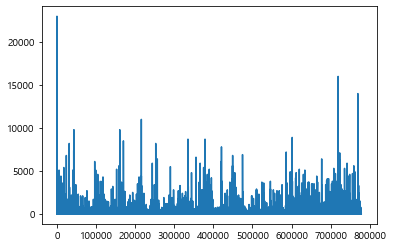

In [41]:
df.like_num.plot()

In [61]:
df.fillna('None')

,comment,like,like_num
0,I remember GOT7 was my first favorite boy grou...,3.8천,3800
1,Ok.. I m not crying😭 they'll come back and shi...,998,998
2,"For everyone's info, GOT7 DID NOT disb*nd. The...",596,596
3,"I'm not a fan of got7, but they were wonderful...",453,453
4,"Sinto tanta falta de vcs juntinhos, mas entend...",48,48
...,...,...,...
778450,@VocaloidC00kies Srry if I offended u just for...,0,0
778451,JB&JR china fan first site welcome to you,0,0
778452,go away goshhh,0,0
778453,Cry*,0,0


In [62]:
df.to_csv('/home/lab10/official_youtube/comment/comments_num_GOT7.csv')

In [63]:
"""# 언어별 분류 작업
- 정확도가 높은 fasttext 모듈로 분류
"""
!pip install fasttext
import copy
import fasttext
import pandas as pd
import re


In [67]:
df

,comment,like,like_num
0,I remember GOT7 was my first favorite boy grou...,3.8천,3800
1,Ok.. I m not crying😭 they'll come back and shi...,998,998
2,"For everyone's info, GOT7 DID NOT disb*nd. The...",596,596
3,"I'm not a fan of got7, but they were wonderful...",453,453
4,"Sinto tanta falta de vcs juntinhos, mas entend...",48,48
...,...,...,...
778450,@VocaloidC00kies Srry if I offended u just for...,0,0
778451,JB&JR china fan first site welcome to you,0,0
778452,go away goshhh,0,0
778453,Cry*,0,0


In [68]:
# path = '/home/lab10/official_youtube/comment/'
# comment_file = 'comments_num_GOT7.csv'  #GOT7 
# df = pd.read_csv(path+comment_file, encoding='utf-8', header=None)
# df.columns=['comment','like', 'like_num']

In [70]:
# 중복 값 제거
print("GOT7 전처리 시작")
print('\n')
print('중복 제거 전 :',df.shape)
df = df.drop_duplicates(['comment'],keep='last',ignore_index=True)
print('GOT7 중복 제거 후 :',df.shape)
print('\n')

# 소문자로 바꾸기
df['comment'] = df['comment'].str.lower()

GOT7 전처리 시작


중복 제거 전 : (698800, 3)
GOT7 중복 제거 후 : (687679, 3)




In [73]:
# 전처리 전 원본 보존
copy_data = copy.deepcopy(df)

In [80]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687679 entries, 0 to 687678
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   comment   687678 non-null  object
 1   like      687679 non-null  object
 2   like_num  687679 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 15.7+ MB


In [87]:
copy_data.fillna('None',inplace=True)

In [108]:
copy_data

,comment,like,like_num
0,i remember got7 was my first favorite boy grou...,3.8천,3800
1,ok.. i m not crying😭 they'll come back and shi...,998,998
2,"for everyone's info, got7 did not disb*nd. the...",596,596
3,"i'm not a fan of got7, but they were wonderful...",453,453
4,"sinto tanta falta de vcs juntinhos, mas entend...",48,48
...,...,...,...
687674,@vocaloidc00kies srry if i offended u just for...,0,0
687675,jb&jr china fan first site welcome to you,0,0
687676,go away goshhh,0,0
687677,cry*,0,0


In [113]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

comment_result = []

for i in copy_data['comment'].values:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    comment_result.append(tokens)

punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

In [118]:
# comment_result

In [115]:
def clean_punc(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])

    for p in punct:
        text = text.replace(p, f' {p} ')

    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
    for s in specials:
        text = text.replace(s, specials[s])

    return text.strip()

cleaned_corpus = []
for sent in comment_result:
    cleaned_corpus.append(clean_punc(sent, punct, punct_mapping))

In [117]:
# cleaned_corpus

In [123]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
#         review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

basic_preprocessed_corpus = clean_text(cleaned_corpus)
comment_result = pd.DataFrame(basic_preprocessed_corpus, columns=["comment"])

In [124]:
 comment_result

,comment
0,i remember got7 was my first favorite boy grou...
1,ok i m not crying they ll come back and shine ...
2,for everyone s info got7 did not disb nd they ...
3,i m not a fan of got7 but they were wonderful ...
4,sinto tanta falta de vcs juntinhos mas entendo...
...,...
687674,vocaloidc00kies srry if i offended u just forg...
687675,jb jr china fan first site welcome to you
687676,go away goshhh
687677,cry


In [125]:
model = fasttext.load_model('/home/lab10/official_youtube/lid.176.ftz')

predict = []
for t in comment_result.comment.values:
    predict.append(model.predict(t,k=1))

ty = pd.DataFrame(predict)

In [126]:
comment = []
for num, txt in enumerate(ty[0]):
    txt = str(txt)
    if txt == "('__label__ko',)":
        b = re.sub(txt,"ko",txt)
        comment.append(b)
    elif txt == "('__label__en',)":
        b = re.sub(txt,"en",txt)
        comment.append(b)
    elif txt == "('__label__id',)":
        b = re.sub(txt,"id",txt)
        comment.append(b)
    elif txt == "('__label__es',)":
        b = re.sub(txt,"es",txt)
        comment.append(b)
    else:
        b = re.sub(txt,"etc",txt)
        comment.append(b)

comment = pd.DataFrame(comment)
print('\n')
print(f'GOT7댓글 언어 구성')
print(comment.value_counts())
print('\n')
pd.set_option('max_columns',50)
pd.set_option('max_rows',100)
# ty_sum.to_csv('ty_sum.csv', encoding='cp949')



GOT7댓글 언어 구성
(en)     507314
(etc)    134729
(es)      31125
(ko)      11557
(id)       2954
dtype: int64




In [127]:
like = pd.DataFrame(copy_data['like_num'])
data = pd.concat([comment_result,like, comment],axis=1)
data.columns = ['comment','like','lang']


path_preprocess='/home/lab10/official_youtube/pre_comment/'
data.to_csv(path_preprocess+'prepro_'+comment_file,  encoding='utf-8', header=None, index=None)

print(data[:])
print(f"전처리 끝")
print('\n')


                                                  comment  like   lang
0       i remember got7 was my first favorite boy grou...  3800   (en)
1       ok i m not crying they ll come back and shine ...   998   (en)
2       for everyone s info got7 did not disb nd they ...   596   (en)
3       i m not a fan of got7 but they were wonderful ...   453   (en)
4       sinto tanta falta de vcs juntinhos mas entendo...    48  (etc)
...                                                   ...   ...    ...
687674  vocaloidc00kies srry if i offended u just forg...     0   (en)
687675          jb jr china fan first site welcome to you     0  (etc)
687676                                     go away goshhh     0   (en)
687677                                                cry     0   (en)
687678                                    jj ling jun jie     0   (en)

[687679 rows x 3 columns]
전처리 끝


